In [16]:
import pandas as pd
from analysis_functions import get_time_periods, get_power_data, divide_power_data_into_step_periods, compute_relative_energy_usage
from analysis_functions import plot_energy_usage, plot_multiple_datasets, plot_energy_usage_overlay_multiple_datasets

In [72]:
base_path = "./data_carbontracker/conf-5"
corresponding_datasets = {
    "run1": {
        "simpipe": f"{base_path}/run1.dat", 
        "tapo": f'{base_path}/power-run1.xls', 
        "start_time_baseline": '2025-08-27 00:00:00', 
        "end_time_baseline": '2025-08-27 07:00:00',
        "end_time_pipeline": '2025-08-27 16:35:00'},
    "run2": {
        "simpipe": f"{base_path}/run2.dat", 
        "tapo": f'{base_path}/power-run2.xls', 
        "start_time_baseline": '2025-08-27 22:00:00', 
        "end_time_baseline": '2025-08-28 03:00:00',
        "end_time_pipeline": None},
    "run3": {
        "simpipe": f"{base_path}/run3.dat", 
        "tapo": f'{base_path}/power-run3.xls', 
        "start_time_baseline": '2025-08-27 22:00:00', 
        "end_time_baseline": '2025-08-28 07:00:00',
        "end_time_pipeline": None},
    "run4": {
        "simpipe": f"{base_path}/run4.dat", 
        "tapo": f'{base_path}/power-run4.xls', 
        "start_time_baseline": '2025-08-28 00:00:00', 
        "end_time_baseline": '2025-08-28 09:00:00',
        "start_time_pipeline": '2025-08-28 14:19:24',
        "end_time_pipeline": '2025-08-28 18:43:57'},
}
# corresponding datasets tuples contain the following information: 
# (carbontracker_simpipe_data, tapo_data, start_time_baseline, end_time_baseline, end_time_pipeline)

In [73]:
#runNr = "run1" # runNr = 1, 2, 3, 4 // corresponds to 0, 1, 2, 3 in the corresponding_datasets
#runNr = "run2"
#runNr = "run3"
runNr = "run4"
path = corresponding_datasets[runNr]["simpipe"]
carbontracker_simpipe_data = pd.read_csv(path, delim_whitespace=True, comment='#', header=0)

/var/folders/9x/df97rq2j35gg_bpq8dzj7wz40000gn/T/ipykernel_26364/1257594026.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  carbontracker_simpipe_data = pd.read_csv(path, delim_whitespace=True, comment='#', header=0)


In [74]:
carbontracker_simpipe_data

,step,start,stop,duration,co2,energy,status,output
0,trimming,2025-08-28T14:19:24Z,2025-08-28T15:04:53Z,2729,1.463,0.048631,Succeeded,trimming-results*
1,alignment,2025-08-28T15:05:03Z,2025-08-28T18:16:01Z,11458,6.572,0.218491,Succeeded,alignment-results*
2,mark-duplicates,2025-08-28T18:16:11Z,2025-08-28T18:39:55Z,1424,0.497,0.016534,Succeeded,mark-duplicates-results*
3,create-fasta-index,2025-08-28T18:40:05Z,2025-08-28T18:41:11Z,66,0.006,0.000193,Succeeded,fasta-index*
4,base-quality-score,2025-08-28T18:41:20Z,2025-08-28T18:43:57Z,157,0.008,0.000278,Succeeded,final-results*


In [75]:
dt_format = '%Y-%m-%d %H:%M:%S'
for _, row in carbontracker_simpipe_data.iterrows():
    start_time = pd.to_datetime(row['start']).strftime(dt_format)
    stop_time = pd.to_datetime(row['stop']).strftime(dt_format)
    print(f"Step: {row['step']}, Start: {start_time}, Stop: {stop_time}")

Step: trimming, Start: 2025-08-28 14:19:24, Stop: 2025-08-28 15:04:53
Step: alignment, Start: 2025-08-28 15:05:03, Stop: 2025-08-28 18:16:01
Step: mark-duplicates, Start: 2025-08-28 18:16:11, Stop: 2025-08-28 18:39:55
Step: create-fasta-index, Start: 2025-08-28 18:40:05, Stop: 2025-08-28 18:41:11
Step: base-quality-score, Start: 2025-08-28 18:41:20, Stop: 2025-08-28 18:43:57


In [76]:
power_data = get_power_data(data_path=corresponding_datasets[runNr]["tapo"]) # get tapo power data

In [77]:
power_data.describe()

,Date,Power(W),Energy(kWh)
count,288,288.000000,288.000000
mean,2025-08-28 08:52:30,220.600694,0.018383
min,2025-08-27 20:55:00,194.000000,0.016167
25%,2025-08-28 02:53:45,205.000000,0.017083
50%,2025-08-28 08:52:30,208.000000,0.017333
75%,2025-08-28 14:51:15,214.000000,0.017833
max,2025-08-28 20:50:00,329.000000,0.027417
std,NaN,34.081634,0.002840


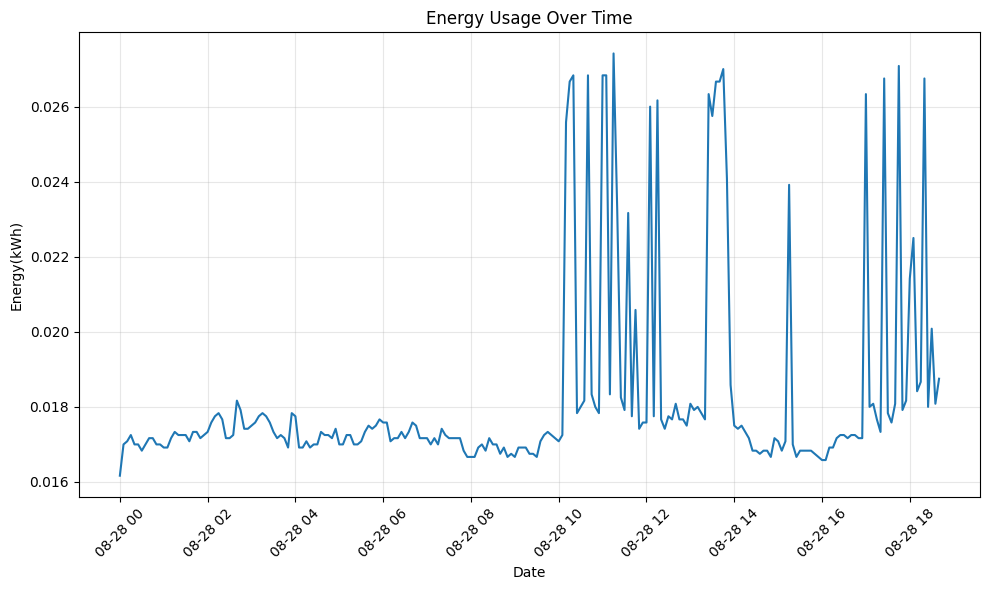

In [78]:
#raw_power_data.plot(x='Date', y='Energy(kWh)', title='Energy Usage Over Time')
#start_time = corresponding_datasets[runNr -1][2]
title = "Energy Usage Over Time"
xcol="Date"
ycol="Energy(kWh)"
start_time_baseline = corresponding_datasets[runNr]["start_time_baseline"]
end_time_baseline = corresponding_datasets[runNr]["end_time_baseline"]
#start_time_pipeline = '2025-08-27 14:41:59'
start_time_pipeline = corresponding_datasets[runNr]["start_time_pipeline"]
end_time_pipeline = corresponding_datasets[runNr]["end_time_pipeline"]

# run4 // 
plot_energy_usage(power_data, x_col=xcol, y_col=ycol, title=title, start=start_time_baseline, end=end_time_pipeline)

# run3 // 
#plot_energy_usage(power_data, x_col=xcol, y_col=ycol, title=title, start=start_time_baseline, end=None)

# run 2 // 
#plot_energy_usage(power_data, x_col=xcol, y_col=ycol, title=title, start=start_time_pipeline, end=None)

# run 1 // 
#plot_energy_usage(power_data, x_col=xcol, y_col=ycol, title=title, start=start_time_baseline, end=end_time)

In [79]:
time_periods = get_time_periods(carbontracker_simpipe_data, start_time_baseline, end_time_baseline)

In [80]:
time_periods

[('baseline', '2025-08-28 00:00:00', '2025-08-28 09:00:00'),
 ('trimming', '2025-08-28 14:19:24', '2025-08-28 15:04:53'),
 ('alignment', '2025-08-28 15:05:03', '2025-08-28 18:16:01'),
 ('mark-duplicates', '2025-08-28 18:16:11', '2025-08-28 18:39:55'),
 ('create-fasta-index', '2025-08-28 18:40:05', '2025-08-28 18:41:11'),
 ('base-quality-score', '2025-08-28 18:41:20', '2025-08-28 18:43:57')]

In [81]:
power_data_segments = divide_power_data_into_step_periods(time_periods, power_data)

Processing baseline...
    start: 2025-08-28 00:00:00, end: 2025-08-28 09:00:00
Processing trimming...
    start: 2025-08-28 14:19:24, end: 2025-08-28 15:04:53
Processing alignment...
    start: 2025-08-28 15:05:03, end: 2025-08-28 18:16:01
Processing mark-duplicates...
    start: 2025-08-28 18:16:11, end: 2025-08-28 18:39:55
Processing create-fasta-index...
    start: 2025-08-28 18:40:05, end: 2025-08-28 18:41:11
No data found between 2025-08-28 18:40:05 and 2025-08-28 18:41:11
    Warning! No data for period: create-fasta-index
Processing base-quality-score...
    start: 2025-08-28 18:41:20, end: 2025-08-28 18:43:57
No data found between 2025-08-28 18:41:20 and 2025-08-28 18:43:57
    Warning! No data for period: base-quality-score
Last segment detected.
    Last segment contains NO data.
    Using datapoint at 2025-08-28 18:45:00 with Power=268W, Energy=0.022333333333333334kWh, fraction=0.5233333333333333, baseline_energy=0.017204128440366968, baseline_power=206.44954128440367


In [63]:
power_data_segments

[                   Date  Power(W)  Energy(kWh)
 70  2025-08-27 22:00:00       208     0.017333
 71  2025-08-27 22:05:00       208     0.017333
 72  2025-08-27 22:10:00       210     0.017500
 73  2025-08-27 22:15:00       215     0.017917
 74  2025-08-27 22:20:00       210     0.017500
 ..                  ...       ...          ...
 174 2025-08-28 06:40:00       211     0.017583
 175 2025-08-28 06:45:00       210     0.017500
 176 2025-08-28 06:50:00       206     0.017167
 177 2025-08-28 06:55:00       206     0.017167
 178 2025-08-28 07:00:00       206     0.017167
 
 [109 rows x 3 columns],
                    Date  Power(W)  Energy(kWh)
 185 2025-08-28 07:35:00       206     0.017167
 186 2025-08-28 07:40:00       206     0.017167
 187 2025-08-28 07:45:00       206     0.017167
 188 2025-08-28 07:50:00       202     0.016833
 189 2025-08-28 07:55:00       200     0.016667
 190 2025-08-28 08:00:00       200     0.016667
 191 2025-08-28 08:05:00       200     0.016667
 192 2025-08-

In [51]:
#plot_energy_usage_overlay_multiple_datasets(power_data, power_data_segments, time_periods, start_time_baseline, end_time)

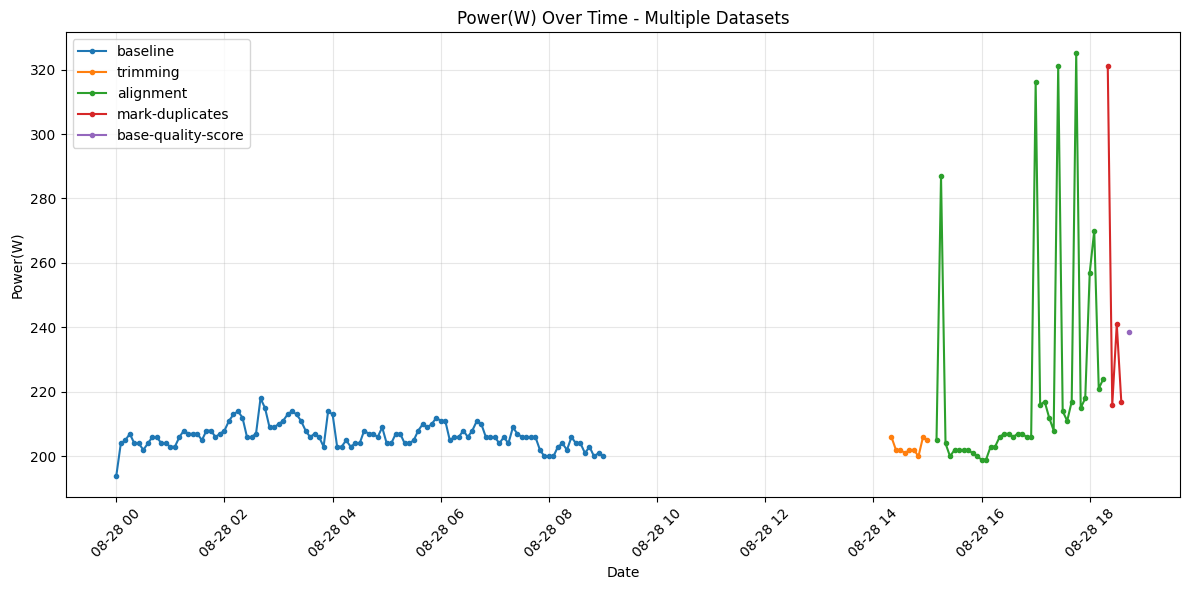

In [82]:
plot_multiple_datasets(power_data_segments, time_periods)

The BSQR step is not in the plot becaus there is no datapoint for it in the tapo power data.

However, we do attribute a contribution to it here, in the power_data_segments, which is the fractional contribution of the data point after the BSQR step.

This is coded/computed in the function divide_power_data_into_step_periods(). 

# Compute the total energy of the pipeline for the Tapo power data and compare with the carbontracker data
To compute the total energy of the pipeline for the Tapo data, we compute the average energy for the baseline and subtract this value from each energy value in the dataset, then compute the sum of the energy in the pipeline duration.

In [83]:
compute_relative_energy_usage(power_data_segments, time_periods)

Warning! Empty segment 4
Total energy consumption (kWh): 0.06227373343527032


/Users/gorans/Documents/Gnuplot/carbontracker/mainframe/analysis_functions.py:184: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outdf = pd.concat([outdf, new_row], ignore_index=True)


,step,start,stop,duration,energy(kWh)
0,trimming,2025-08-28 14:19:24,2025-08-28 15:04:53,2729.0,-0.002670
1,alignment,2025-08-28 15:05:03,2025-08-28 18:16:01,11458.0,0.048160
2,mark-duplicates,2025-08-28 18:16:11,2025-08-28 18:39:55,1424.0,0.014100
3,base-quality-score,2025-08-28 18:41:20,2025-08-28 18:43:57,157.0,0.002684
